
# ****Final Project Submission****


- Student name: Scott Johnson
- Student pace: Part Time
- Scheduled project review date/time: 2/19/2021
- Instructor name: Amanda Yandow
 
# Project Title: Modeling Census Data for COVID-19 Stimulus Checks

Build a classifier to predict whether a citizen should recieve a stimulus check based on having and income over/under 50K. Lessons learned from data set can be recylced to improve predictions after initial stimulus is delivered to those in neeed.
Outline:

1. Data cleaning and preprocessing
2. EDA
3. Split/Train DataSet
4. Feature Engineering
5. Modeling and Evaluatioin
6. Model evaluating
7. Choosing final model

In [1]:
!export PATH=/Library/TeX/texbin:$PATH

## 1. Data Cleaning and Preprocessing

Import Packages and Data

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

#SCIKIT LEARN
#Scikit-learn is a machine learning toolkit that provides various tools to cater to different aspects of machine
#learning e.g. Classification, Regression, Clustering, Dimensionality reduction, Model selection, Preprocessing.
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

#train test split
from sklearn.model_selection import train_test_split

#k-fold cross validation
from sklearn.model_selection import cross_val_score

#PICKLE for saving objects
import pickle

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Install a pip package in the current Jupyter kernel

import sys
!{sys.executable} -m pip install imblearn

from imblearn.over_sampling import SMOTE

/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
#Load Dataset
income_df = pd.read_csv("income_evaluation.csv")

# print the shape
print('The shape of the dataset : ', income_df.shape)

#Take a look at first 10 rows
income_df.head(10)

The shape of the dataset :  (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
## Convert column names to python format with underscores instead of spaces or dashes

income_df.columns = income_df.columns.str.strip().str.replace('-', '_')
income_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
income_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
income_copy_df = income_df.copy()

### Check for missing data and placeholders.

In [7]:
print(income_copy_df.shape)
income_copy_df.isna().sum()

(32561, 15)


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
#check for place holders

for column in income_copy_df:
    #Select column contents by column name using [] operator
    columnSeriesdf = income_copy_df[column]
    print('Column : ', column)
    print('Contents : ', columnSeriesdf.unique())

Column :  age
Contents :  [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Column :  workclass
Contents :  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Column :  fnlwgt
Contents :  [ 77516  83311 215646 ...  34066  84661 257302]
Column :  education
Contents :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Column :  education_num
Contents :  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Column :  marital_status
Contents :  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Column :  occupation
Contents :  [' Adm-clerical

We can see, even though we don't have any null values, we do have ? placeholders. So let's separate our variables into to categorical and continous and then we'll get decide what to do with the ?'s.

In [9]:
categorical = [var for var in income_copy_df.columns if income_copy_df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [10]:
continuous = [var for var in income_copy_df.columns if income_copy_df[var].dtype!='O']

print('There are {} continuous variables\n'.format(len(continuous)))

print('The continuous variables are :\n\n', continuous)

There are 6 continuous variables

The continuous variables are :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


Looks like we have 9 objects, 6 integer types. However, considering our future purpose, we have 6 continuous variables and 9 categorical variables. See below for what they represent:

#### Continuous Attributes

- age: continuous. **Age of an individual**
- education-num: number of education year, continuous. --> **Individual's year of receiving education**
- fnlwgt: final weight, continuous. --> **The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.**
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous. --> **Individual's working hour per week**


#### Categorical Attributes
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked --> **Individual work category**
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. --> **Individual's highest education degree**
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. --> **Individual marital status**
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. --> **Individual's occupation**
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. --> **Individual's relation in a family**
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. --> **Race of Individual**
- sex: Female, Male.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. --> **Individual's native country**

Let's now deal with the ?'s in our categorical variables. Let's first check their frequency percentage.

In [11]:
for var in categorical:
    
     print(income_copy_df[var].value_counts()/np.float(len(income_copy_df)))

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name:

We will replace the ? with NaN so Python can detect the nulls.

In [12]:
income_copy_df['workclass'].replace(' ?', np.NaN, inplace=True)
income_copy_df['marital_status'].replace(' ?', np.NaN, inplace=True)
income_copy_df['native_country'].replace(' ?', np.NaN, inplace=True)
income_copy_df['occupation'].replace(' ?', np.NaN, inplace=True)

In [13]:
for var in categorical:
    
     print(income_copy_df[var].value_counts()/np.float(len(income_copy_df)))

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital_status, dtype: float6

## 2. Exploratory Data Analysis

Now that we've cleaned up our data. Let's take a look at some of the key things we can learn:

- 25% of sampled population makes over 50k a year, while the other 75% makes under or equal to 50k
- If we wanted to take a shot in the dark, the 75% who would likely need the stimulus check also happen to have an average age of 36 years old and younger,
- none of our continous variables seem to be highly correlated, though education level seems to be slightly correlated with capital gains and # of daily hours worked 
- if we wanted a way to focus our efforts to distribute stimulus money just based on the data alone, we could focus on those who work for private companies, as the majority of those individuals are more likely to be at risk than at other agencies

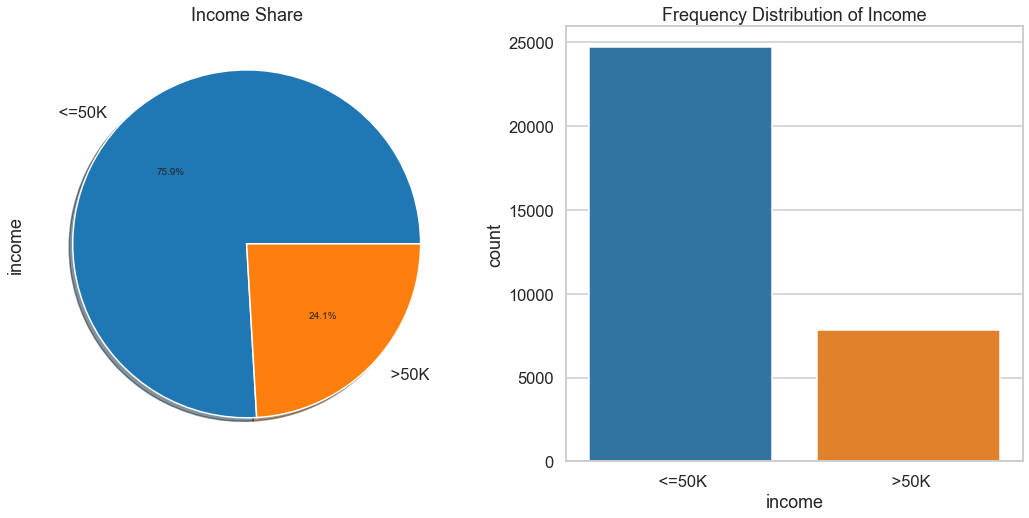

In [14]:
# visualize frequency distribution of income variable
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = income_df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=income_df)
ax[1].set_title("Frequency Distribution of Income")

plt.show()

We can see that 24.1% of the people in our data set make above 50k and 75% make equal to or below 50k.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa49ace9550>,
      dtype=object)

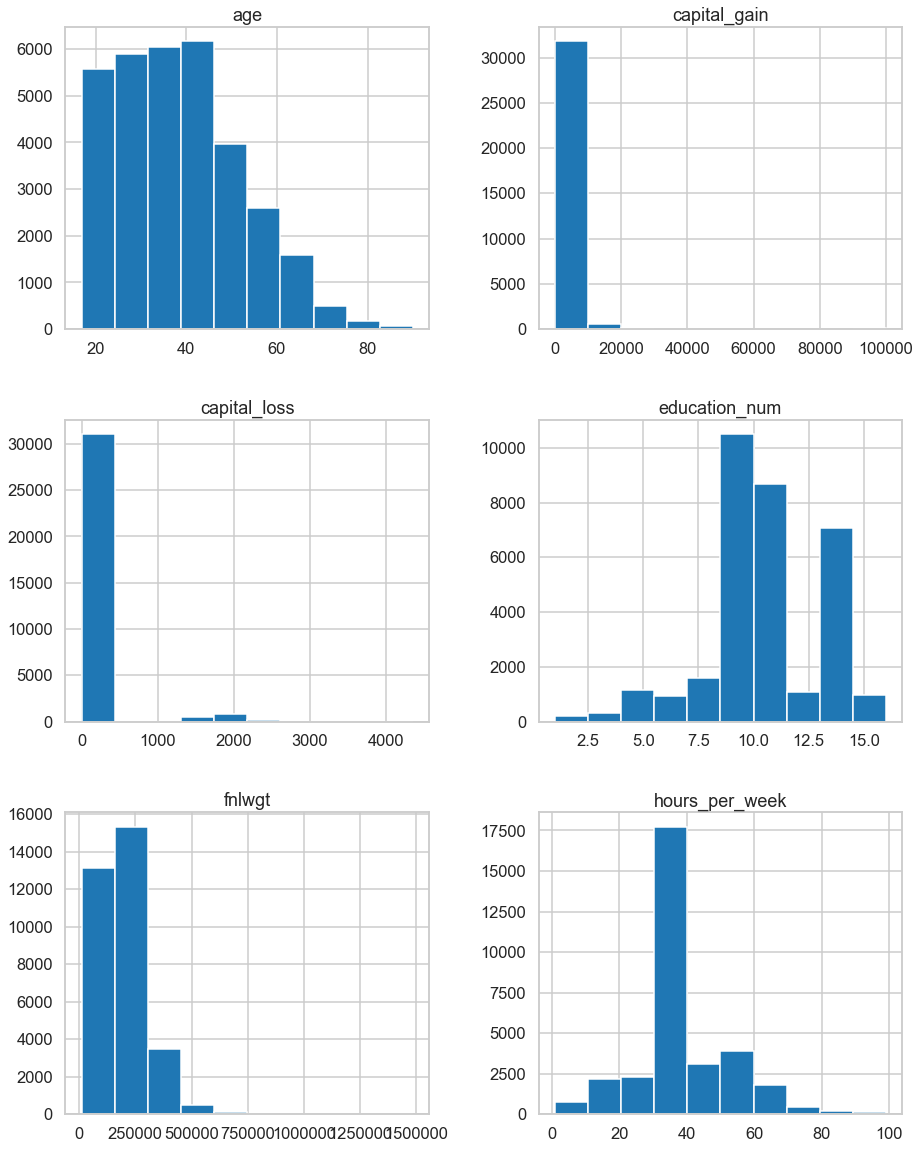

In [15]:
#plots for continuous variables
income_df.hist(figsize = (15, 20))

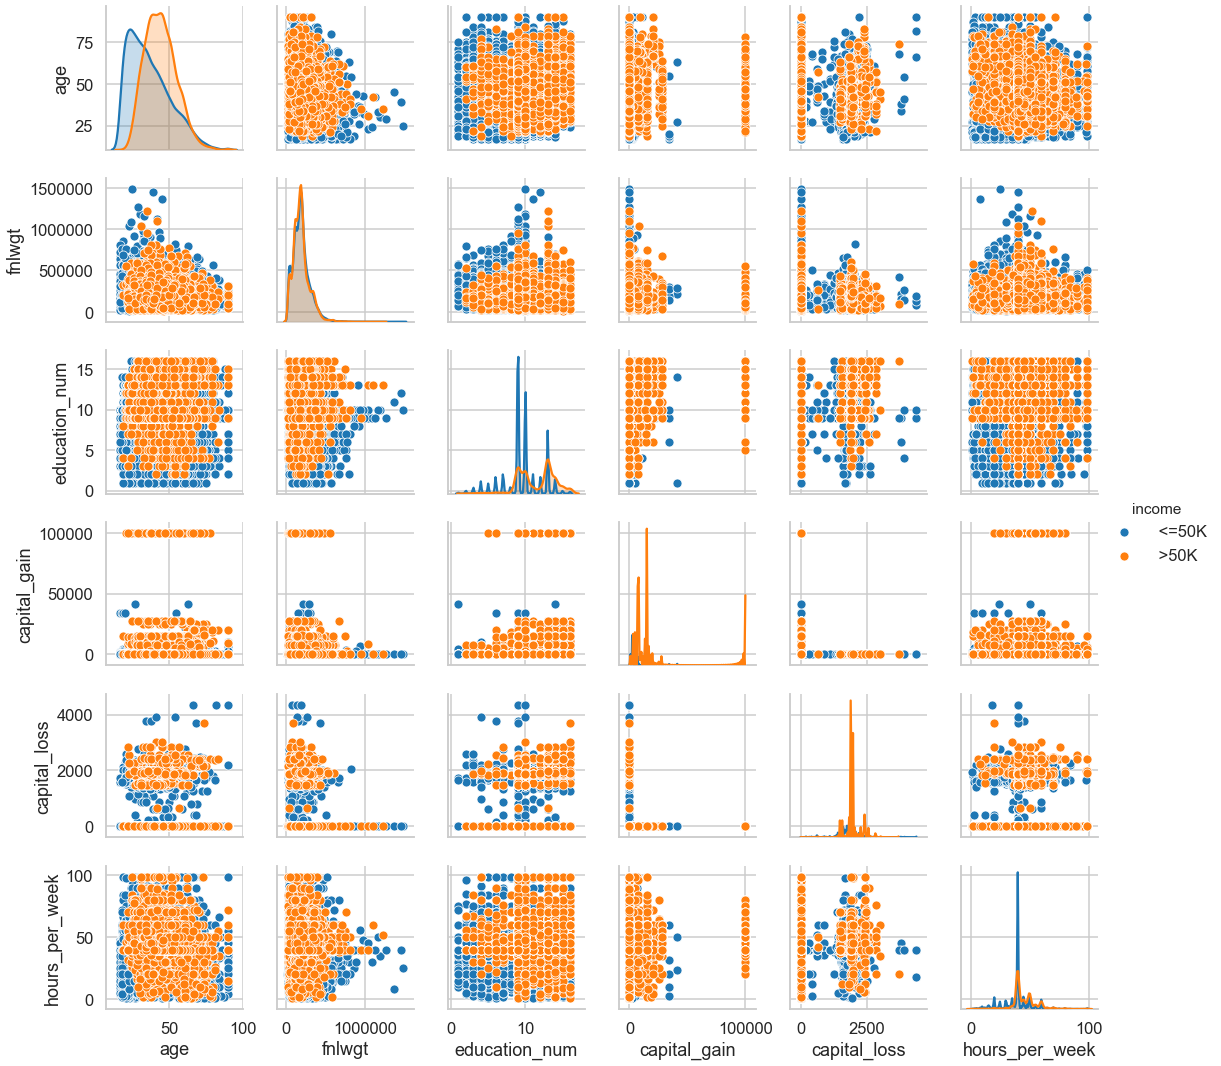

In [16]:
sns.pairplot(income_df, hue="income")

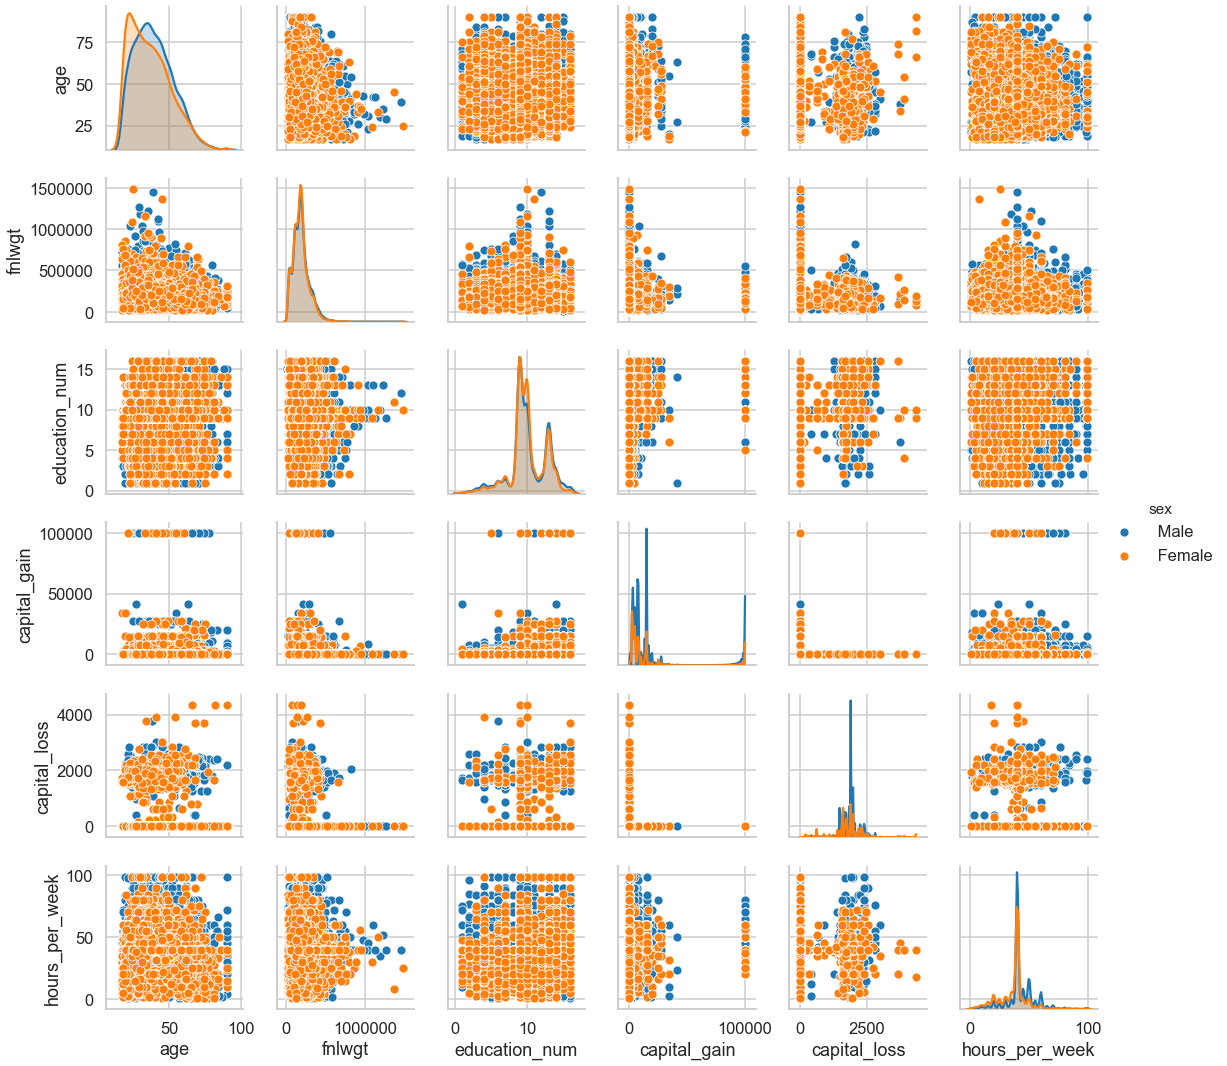

In [17]:
sns.pairplot(income_df, hue="sex")

### Correlation Matrix

Though not significantly high, the most notably correlated values are between the education number and the numbers of hours and captial gain. Are the hardest workers better educated?

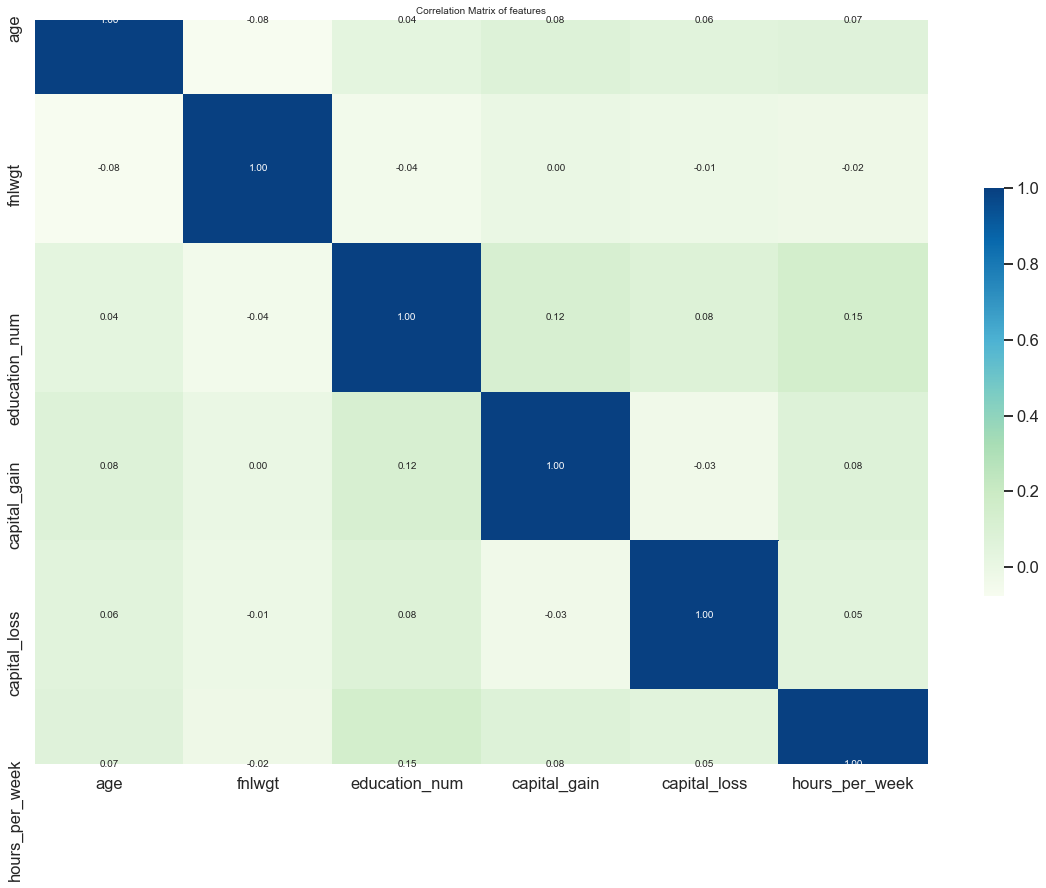

In [18]:
correlation_matrix = income_df.corr()
plt.figure(figsize=(20, 15))
ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=10)
plt.show()

In [19]:
## Let's find out if there are discrepancies between average ages.
income_df.groupby(['income'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


Generally the average age of individuals who make above 50K seem to be 44 and older. So in terms of priority, the stimulus checks should prioritize a younger crowd. Based on age alone, if you would capture the same percentage of the population that would benefit from stimulus checks.

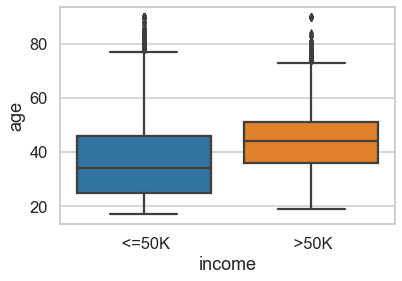

In [20]:
sns.boxplot(x='income', y='age', data=income_df)

In [21]:
## Let's find out if there are discrepancies between race ages.
income_df.groupby(['income'])['race','sex'].describe()

race                          sex                     
        count unique     top   freq  count unique    top   freq
income                                                         
 <=50K  24720      5   White  20699  24720      2   Male  15128
 >50K    7841      5   White   7117   7841      2   Male   6662

What we can see in comparing race and sex is that White-males seem to make up most of this population, which may suggest quite an imbalance of representation in the workforce as it compares to the population.For future studies, we would want to make sure we get a more representative sample across genders, races, and industries to ensure our model is predicting off the correct factors.

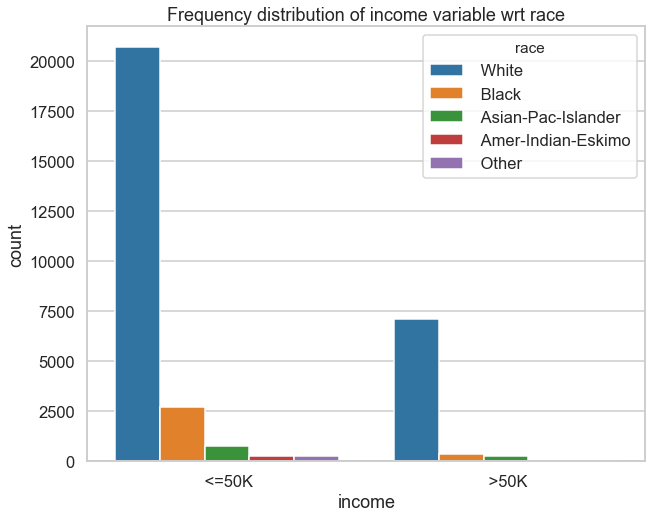

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=income_copy_df)
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

Other trends include a higher average hours per week worked by those who make over 50K and a higher education number.

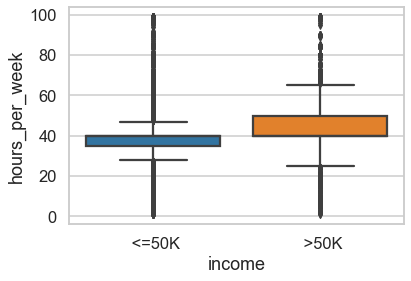

In [23]:
sns.boxplot(x='income', y='hours_per_week', data=income_df)

In [171]:
income_df.groupby(['income'])['education'].value_counts()

income  education    
 <=50K   HS-grad         8826
         Some-college    5904
         Bachelors       3134
         11th            1115
         Assoc-voc       1021
         10th             871
         Assoc-acdm       802
         Masters          764
         7th-8th          606
         9th              487
         12th             400
         5th-6th          317
         1st-4th          162
         Prof-school      153
         Doctorate        107
         Preschool         51
 >50K    Bachelors       2221
         HS-grad         1675
         Some-college    1387
         Masters          959
         Prof-school      423
         Assoc-voc        361
         Doctorate        306
         Assoc-acdm       265
         10th              62
         11th              60
         7th-8th           40
         12th              33
         9th               27
         5th-6th           16
         1st-4th            6
Name: education, dtype: int64

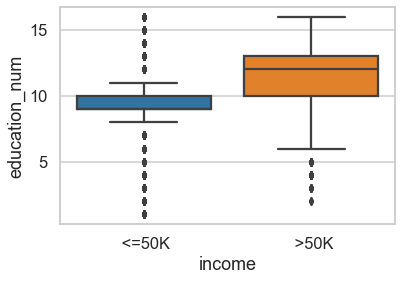

In [24]:
sns.boxplot(x='income', y='education_num', data=income_df)

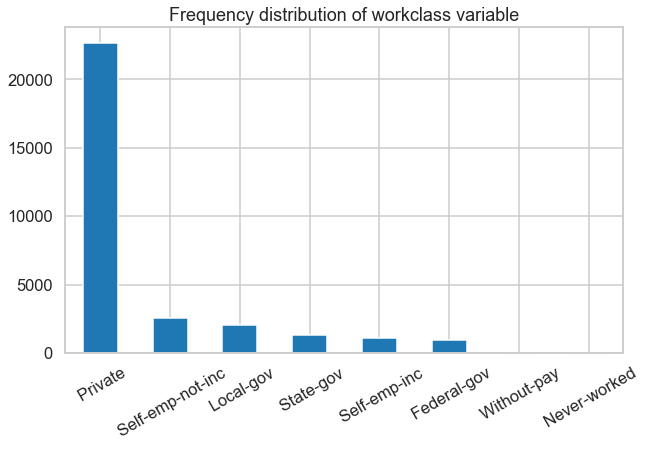

In [25]:
f, ax = plt.subplots(figsize=(10, 6))
ax = income_copy_df.workclass.value_counts().plot(kind="bar")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(income_copy_df.workclass.value_counts().index, rotation=30)
plt.show()

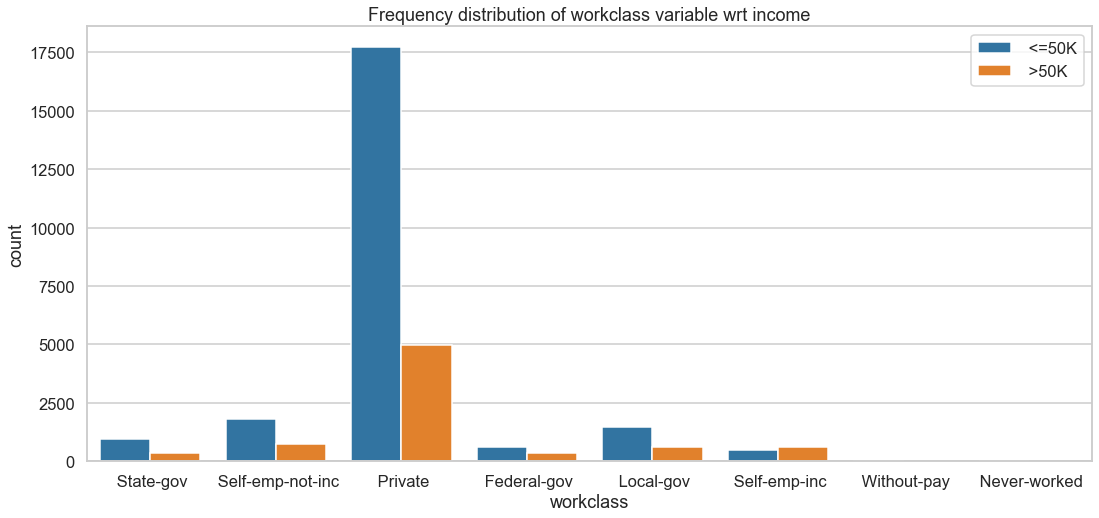

In [26]:
f, ax = plt.subplots(figsize=(18, 8))
ax = sns.countplot(x="workclass", hue="income", data=income_copy_df)
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

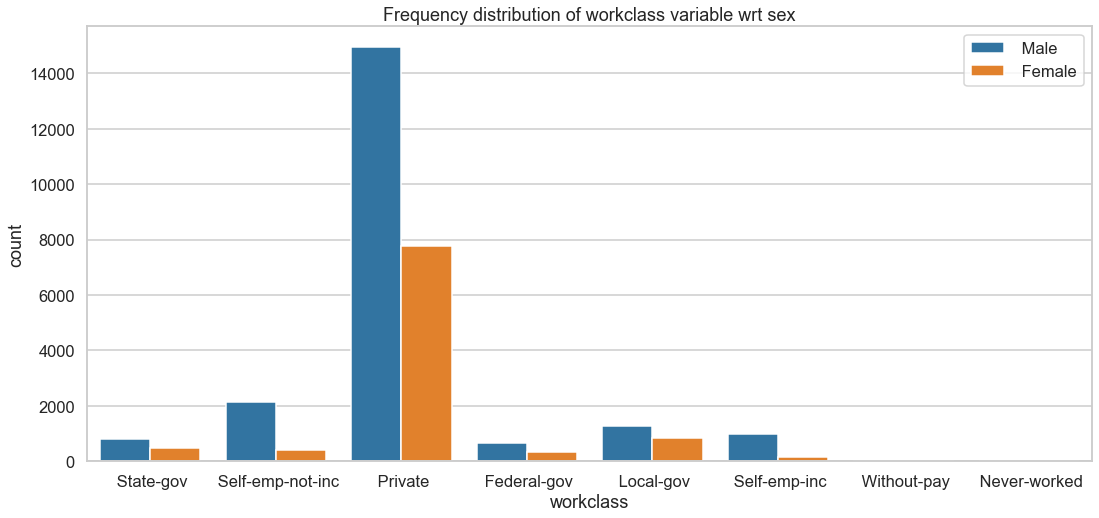

In [27]:
f, ax = plt.subplots(figsize=(18, 8))
ax = sns.countplot(x="workclass", hue="sex", data=income_copy_df)
ax.set_title("Frequency distribution of workclass variable wrt sex")
ax.legend(loc='upper right')
plt.show()

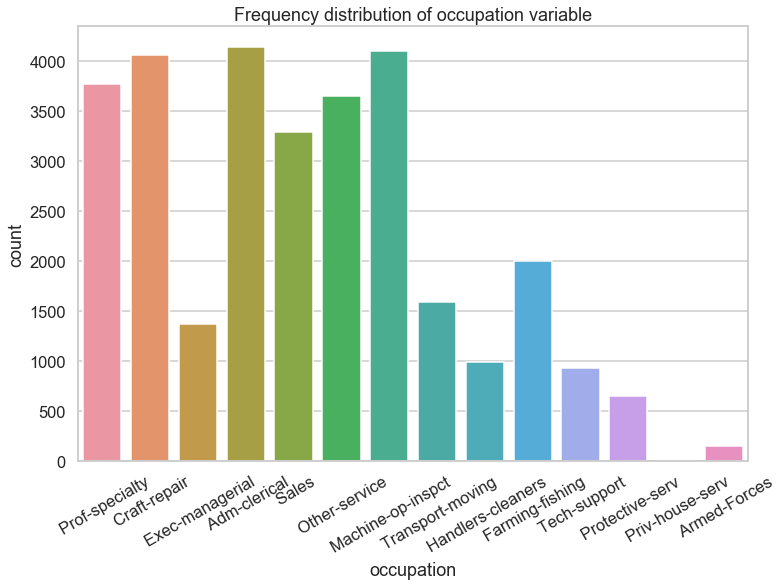

In [28]:
# visualize frequency distribution of `occupation` variable

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=income_copy_df)
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(income_copy_df.occupation.value_counts().index, rotation=30)
plt.show()

## 3. Feature Engineering

Let's move on to Feature Engineering. We need to first engineer a replacement for the now null values that were changed from ? to NaN. Afterward we'll use LabelEncoder to encode the categorical variables.

In [29]:
#Seperate out categorical and numeric/continuous variables so that we can make sure all necessary changes are resolved.
categorical = []
numeric = []
for c in income_copy_df.columns:
    if income_copy_df[c].dtypes == 'object':
        categorical.append(c)
    else:
        numeric.append(c)
        
categorical, numeric

(['workclass',
  'education',
  'marital_status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native_country',
  'income'],
 ['age',
  'fnlwgt',
  'education_num',
  'capital_gain',
  'capital_loss',
  'hours_per_week'])

In [30]:
income_copy_df[categorical].isnull().mean()

workclass         0.056386
education         0.000000
marital_status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.017905
income            0.000000
dtype: float64

Though we relabeled our null categorical values as NaN, we still have to decide what to do with them. For workclass, occupation, and native_country, they account for less than 10 percent of the data, but still represent thousands of people, we won't delete them. Instead we'll impute the missing values with the most frequent (or the mode). We'll need to do this for both X_train and X_test.

In [31]:
for x in [income_copy_df]:
    x['workclass'].fillna(income_copy_df['workclass'].mode()[0], inplace=True)
    x['occupation'].fillna(income_copy_df['occupation'].mode()[0], inplace=True)
    x['native_country'].fillna(income_copy_df['native_country'].mode()[0], inplace=True) 

In [32]:
income_copy_df[categorical].isnull().mean()

workclass         0.0
education         0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native_country    0.0
income            0.0
dtype: float64

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
income_copy_df.income = labelencoder.fit_transform(income_copy_df.income)

In [34]:
income_copy_df = pd.get_dummies(income_copy_df)
income_copy_df.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
income_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 106 entries, age to native_country_ Yugoslavia
dtypes: int64(7), uint8(99)
memory usage: 4.8 MB


## 4. Train, Test, Split After Setting Target variable -->> try 80/20 and try SMOTE --> both to address class imbalance

In [35]:
##feature vector
X = income_copy_df.drop(['income'], axis=1)

##target
y = income_copy_df['income'] 

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Let's map all the feature variables onto the same scale [feature scaling]. Must scale afterwards, test data shouldn't be seen by model at all. ******


In [37]:
cols = X_train.columns

In [38]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [39]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.40,-0.058906,-0.333333,7298.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-0.578076,-0.333333,1831.0,0.0,-0.4,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.080425,0.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,-0.270650,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
4,-0.70,0.210240,-2.000000,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0


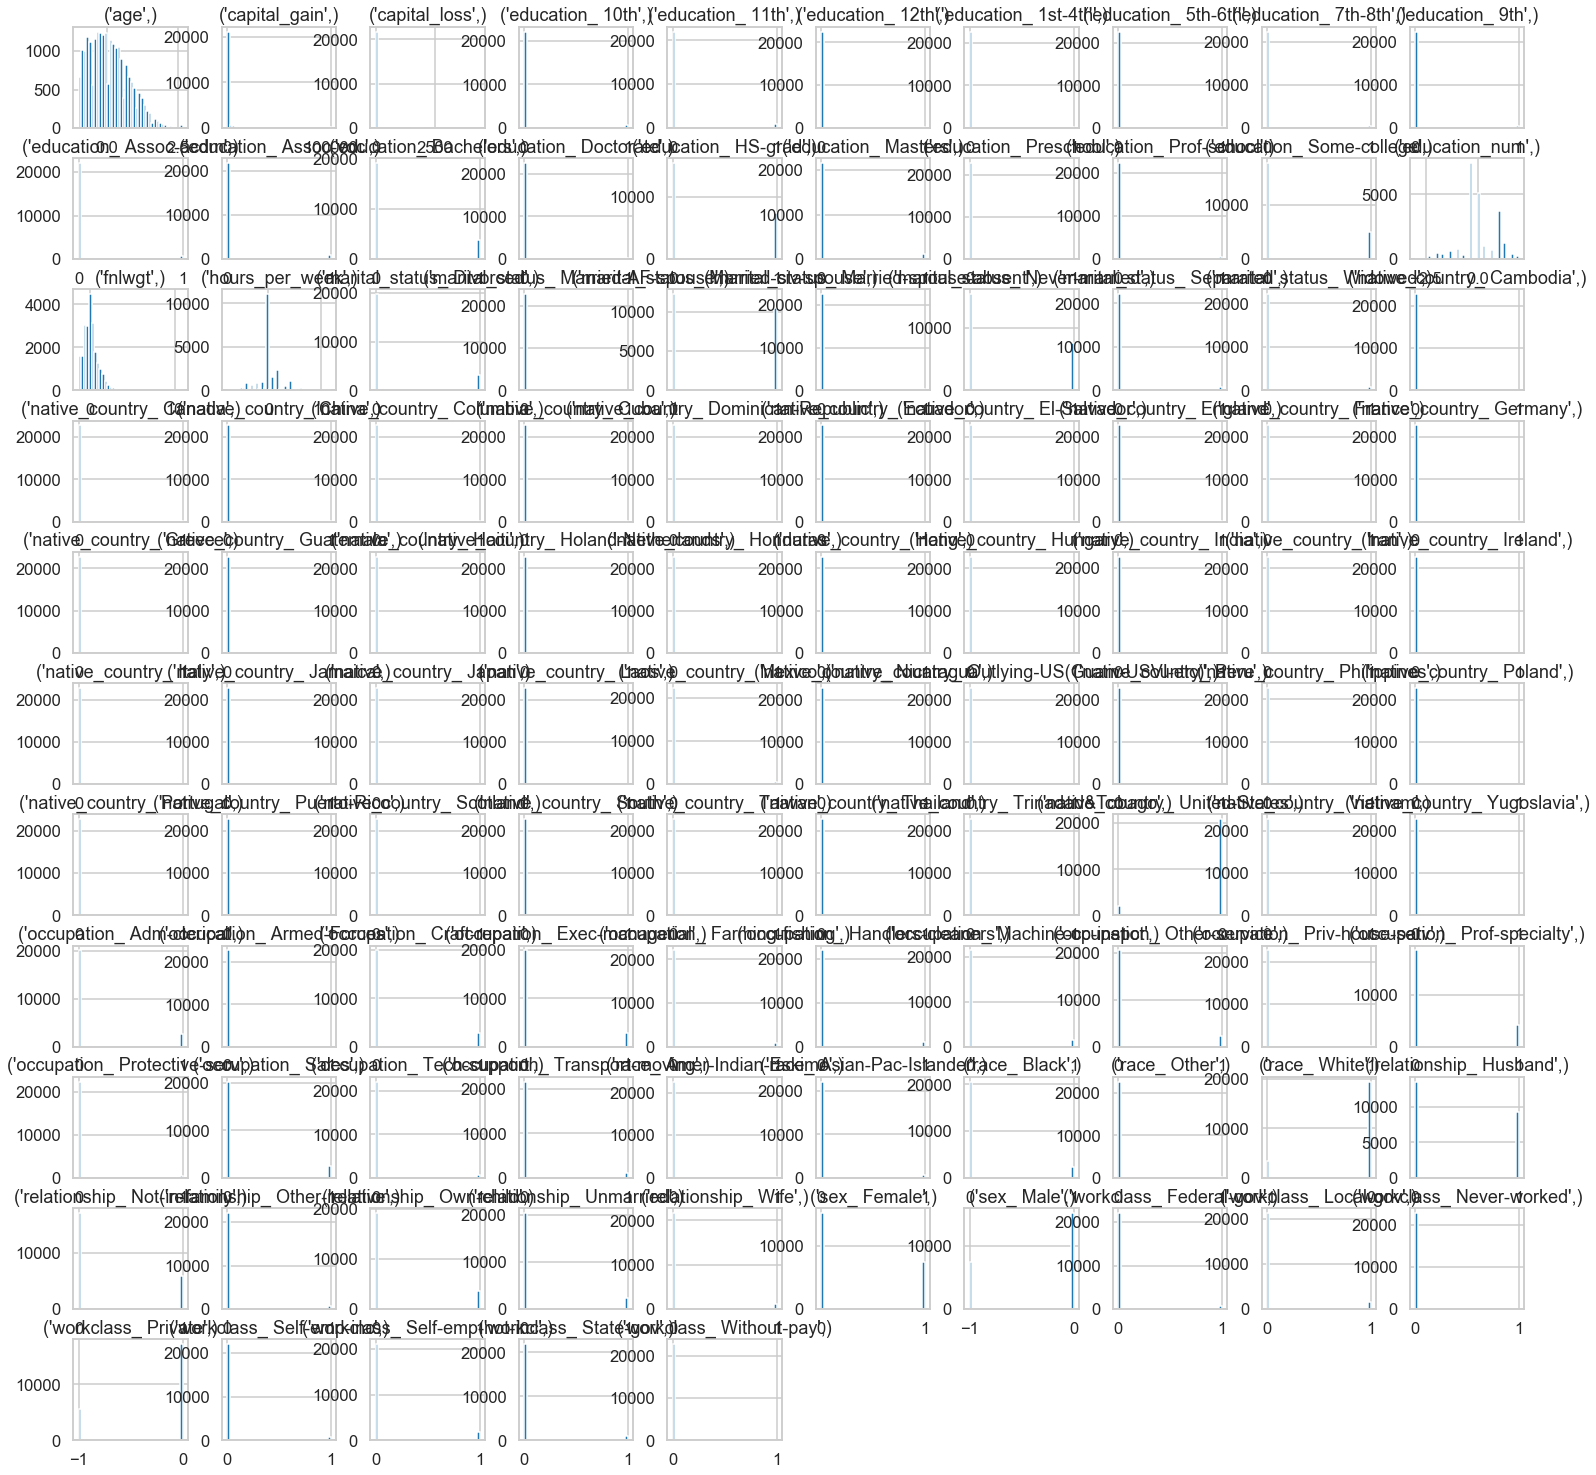

In [43]:
X_train.hist(bins= 40, figsize  = [26, 26])
plt.show();

In [42]:
X_test = pd.DataFrame(X_test, columns=[cols])
X_test.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,-0.50,-0.006571,0.000000,0.0,0.0,0.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.50,0.323136,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.60,0.656361,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.45,-0.253496,-2.333333,0.0,1902.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.40,-0.042564,-1.000000,0.0,2824.0,7.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pickle your test train data sets so you don't have to reset the entire notebook every time you want to reeval the models.

In [45]:
##Export X_train, X_test
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')

### Export y_train (original), and y_test
pickle_out = open('y_train.pickle', 'wb')
pickle.dump(y_train, pickle_out)

pickle_out = open('y_test.pickle', 'wb')
pickle.dump(y_test, pickle_out)

Look for Imbalance:

0    24720
1     7841
Name: income, dtype: int64


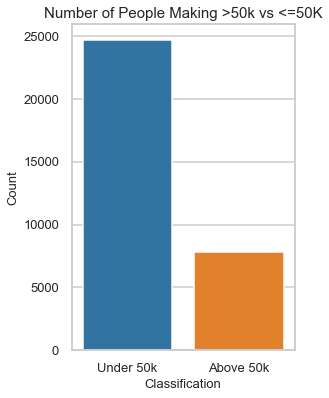

In [132]:

# for the original data before splitting
x = income_copy_df.drop(columns = 'income')
y = income_copy_df.income
print(y.value_counts())

plt.figure(figsize=(4,6))
sns.countplot(y)

plt.xticks(size = 13)
plt.yticks(size = 13)

plt.title('Number of People Making >50k vs <=50K', size = 15)

positions = (0,1)
labels = ("Under 50k","Above 50k")
plt.xticks(positions, labels)

plt.xlabel('Classification', size = 13)
plt.ylabel('Count', size = 13);

0    17313
1     5479
Name: income, dtype: int64


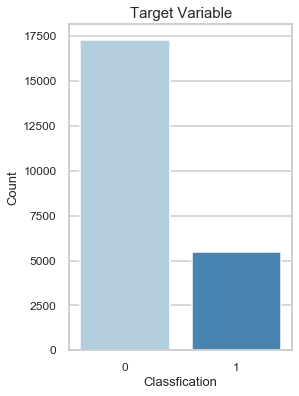

In [133]:
#training data imbalance
print(y_train.value_counts())

plt.figure(figsize=(4,6))
sns.countplot(y_train, palette='Blues')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Target Variable', size = 15)
plt.xlabel('Classfication', size = 13)
plt.ylabel('Count', size = 13);

Use SMOTE (Synthestic Minority Oversampling Technique) or ADSYN (Adaptive Synthetic Sampling) to synthesize new samples from the minority class. With more time, I can include this to improve the perfomance of my model.

## Model 1 Random Forest Classifier Model + Evaluation

Some of the conclusions of this model are that the default parameters 10 trees work best so far, giving :

- Precision: 0.9927508584509729
- Accuracy: 0.9862671112671113
- Recall: 0.9498083591896331
- F1: 0.9708049622236731

however, the cross validation was a moderate 0.73.

The accuracy was lower with 5 and 100 trees 0.79 and 0.82 -> 0.84 cross val respectively.

It also suggest that the most important features are age, fnlwg, education, number of hours worked per week, followed by being married.

In [98]:
#Import library just in case you want to start from here
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score

In [99]:
X_train = pd.read_csv('X_train.csv')

pickle_in = open('y_train.pickle', 'rb')
y_train = pickle.load(pickle_in)

In [100]:
#creating a confusion matrix template
import warnings
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10, 5]

# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [101]:
clf_def = RandomForestClassifier(n_jobs=-1)
clf_def.fit(X_train, y_train);

In [102]:
clf_def.decision_path(X_train);

In [103]:
print(clf_def.feature_importances_)

[1.07887359e-01 1.11774050e-01 1.08158356e-01 5.48592569e-02
 9.43603539e-02 2.88331032e-02 7.47748466e-02 4.97434748e-03
 5.15676424e-03 0.00000000e+00 1.03016801e-02 5.15569084e-03
 8.54064097e-03 4.66084035e-03 5.83572855e-05 1.44306445e-03
 1.75735922e-03 7.34488285e-04 2.40051675e-04 6.53454709e-04
 1.83917946e-03 1.81579466e-03 2.44251818e-03 3.39991408e-03
 1.56762214e-02 4.42576810e-03 9.04046416e-03 1.17825886e-02
 3.14667873e-05 4.91281328e-03 4.53632120e-03 3.19098472e-03
 3.50615090e-04 6.61219208e-02 9.56735424e-04 2.65138560e-02
 1.17692677e-03 1.04070471e-03 4.86715511e-03 1.20985855e-05
 6.55438852e-03 1.54446832e-02 4.24321239e-03 2.74426388e-03
 4.57612232e-03 1.04262628e-02 7.10814846e-05 9.49766477e-03
 3.16893170e-03 7.51127549e-03 4.79783146e-03 5.13276362e-03
 4.28172827e-02 1.40404312e-02 1.97034505e-03 1.11428944e-02
 4.70169404e-03 1.42698109e-02 1.31225014e-03 2.91122664e-03
 4.84078005e-03 7.67262073e-04 5.94928385e-03 9.00847953e-03
 6.94366064e-03 2.490534

Confusion Matrix, without normalization
[[17274    39]
 [  226  5253]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17313
           1       0.99      0.96      0.98      5479

    accuracy                           0.99     22792
   macro avg       0.99      0.98      0.98     22792
weighted avg       0.99      0.99      0.99     22792

roc_auc_score: 0.9782494772418967


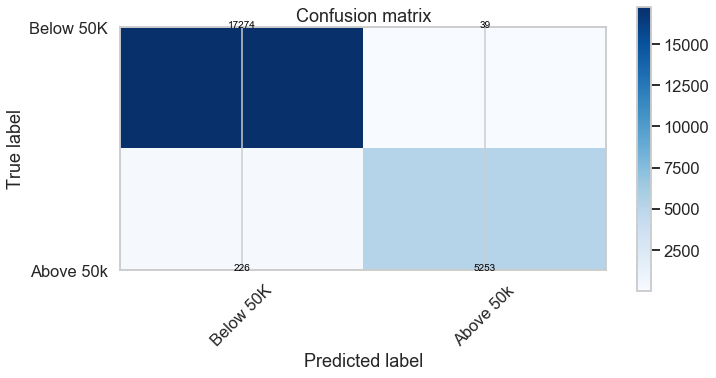

In [104]:
y_pred_def = clf_def.predict(X_train)

cm_def = confusion_matrix(y_train, y_pred_def)
classes = ['Below 50K', 'Above 50k']
plot_confusion_matrix(cm_def, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_train, y_pred_def))
#Checking performance our model with ROC Score.
print ('roc_auc_score:', roc_auc_score(y_train, y_pred_def))

In [105]:
print('Precision: {}\nAccuracy: {}\nRecall: {}\nF1: {}'.format(precision_score(y_train, y_pred_def), 
                accuracy_score(y_train, y_pred_def), 
                recall_score(y_train, y_pred_def), 
                f1_score(y_train, y_pred_def)))

Precision: 0.9926303854875284
Accuracy: 0.9883731133731134
Recall: 0.958751597006753
F1: 0.9753968990808651


In [112]:
scoreRF = cross_val_score(clf_def, X_train, y_train, cv=5, scoring= 'precision')

In [2]:
print(scoreRF)

NameError: name 'scoreRF' is not defined

In [113]:
np.average(scoreRF)

0.7338028817899537

Compare to Test data Cross-validation score!******

In [ ]:
##Use Predict method to compare training and test data --> compre CV scores(do you have overfitting)

##### Find Important Features

In [106]:
feature_scores = pd.Series(clf_def.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

age                                   0.111774
fnlwgt                                0.108158
Unnamed: 0                            0.107887
capital_gain                          0.094360
hours_per_week                        0.074775
                                        ...   
native_country_ Thailand              0.000018
occupation_ Armed-Forces              0.000012
native_country_ Honduras              0.000003
workclass_ Never-worked               0.000000
native_country_ Holand-Netherlands    0.000000
Length: 106, dtype: float64

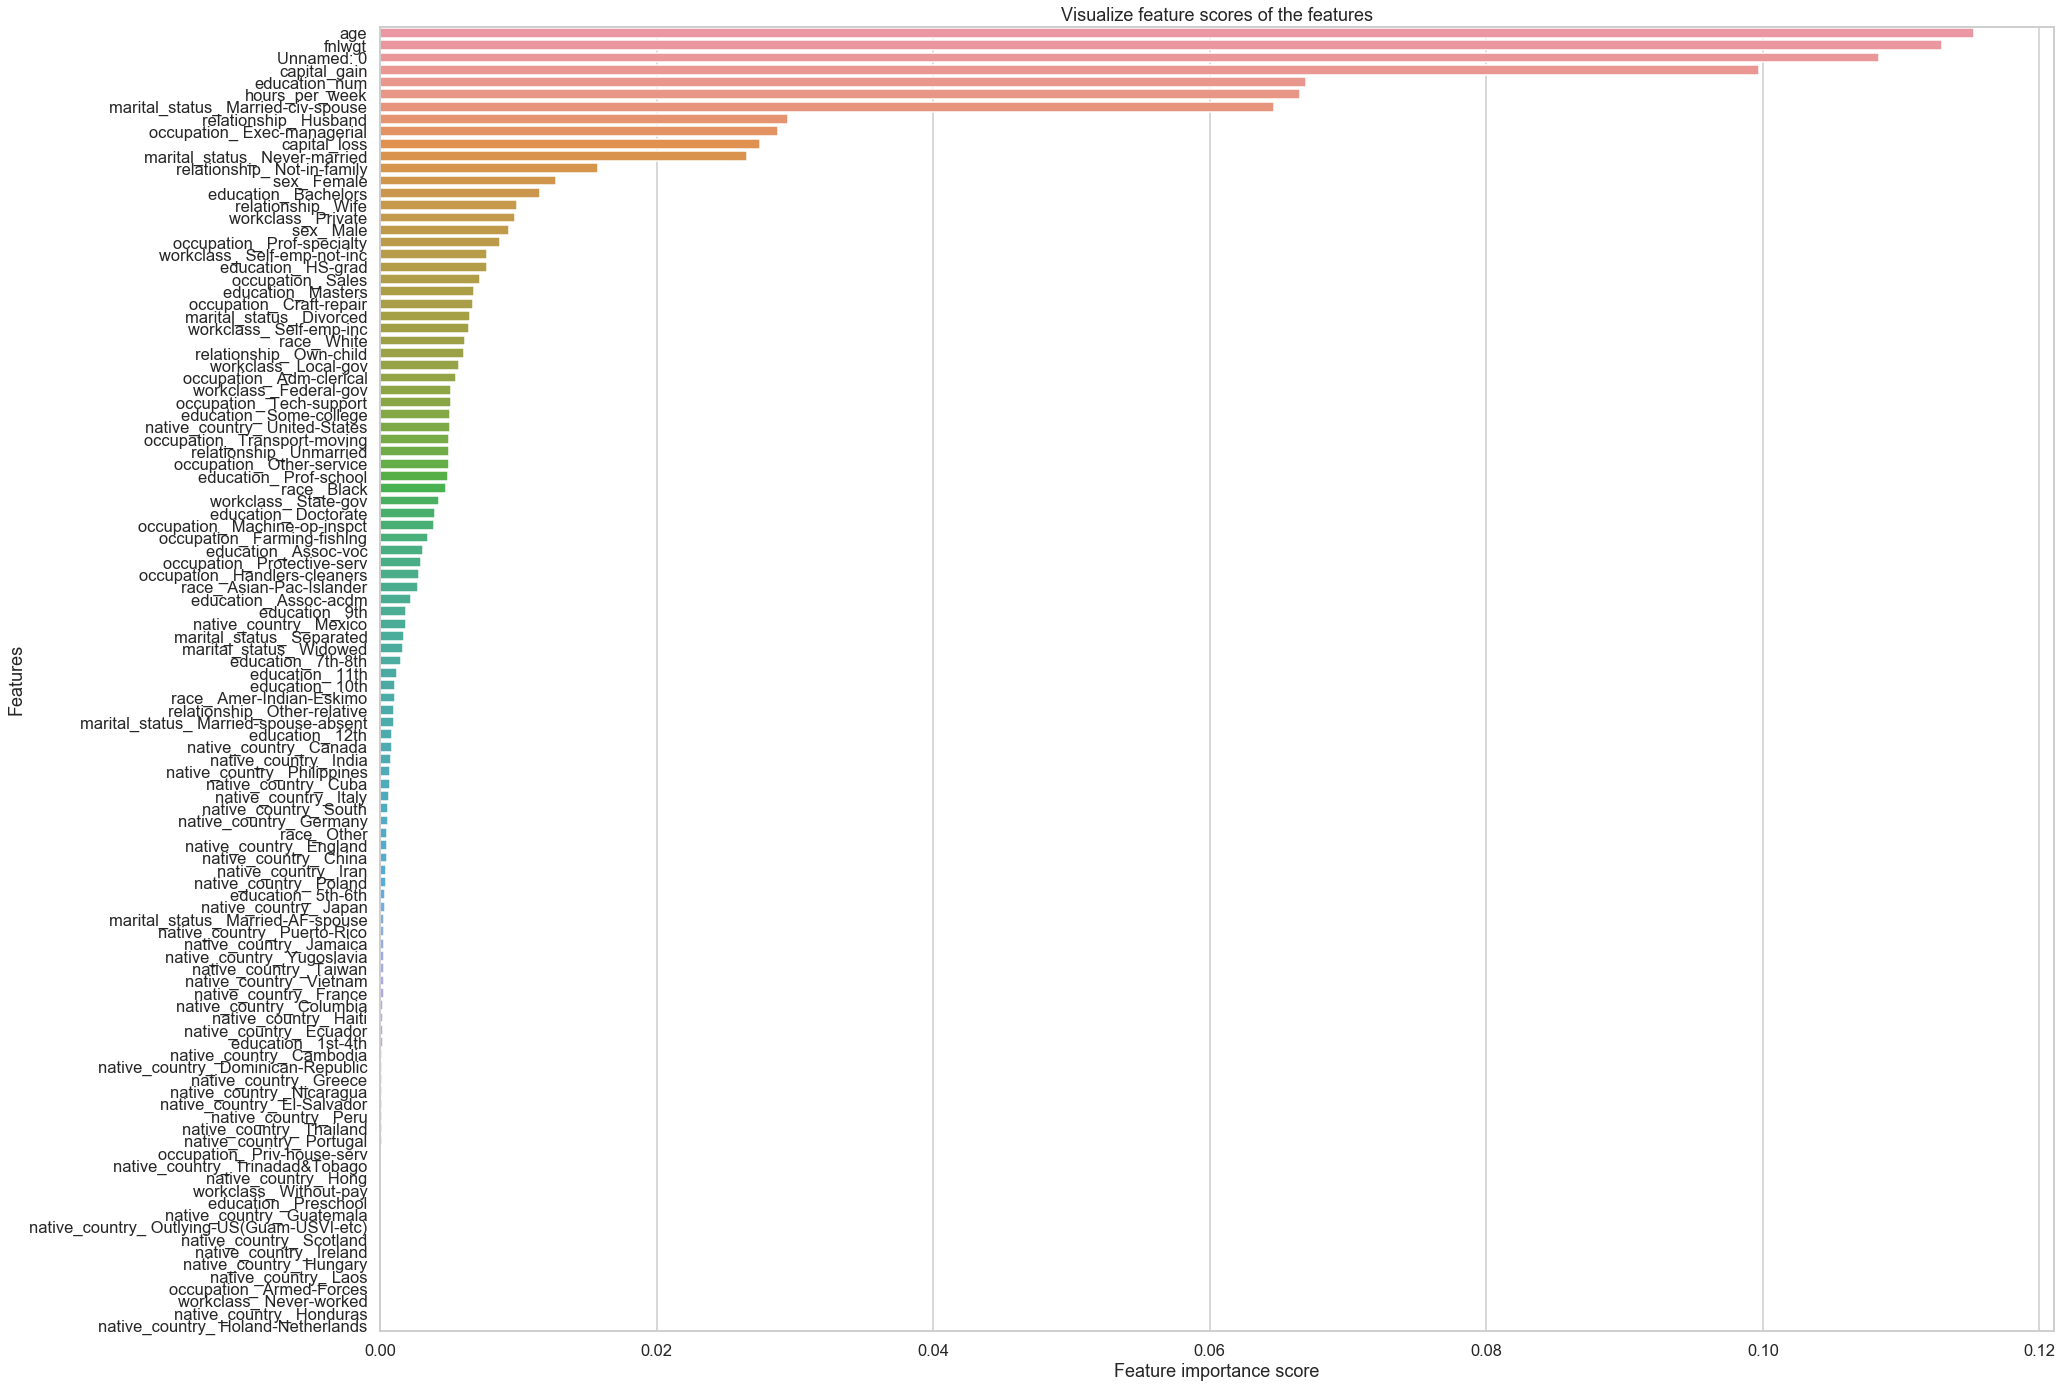

In [89]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=income_copy_df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## Random Forest Classification with max_Depth=4, n_estimators=50

In [116]:
clf = RandomForestClassifier(max_depth=4, random_state=3, n_jobs=-1, n_estimators=50)
clf.fit(X_train, y_train);

In [117]:
clf.decision_path(X_train)

(<22792x1488 sparse matrix of type '<class 'numpy.int64'>'
 	with 5696353 stored elements in Compressed Sparse Row format>,
 array([   0,   29,   60,   91,  122,  153,  182,  209,  236,  267,  298,
         325,  356,  387,  418,  449,  478,  509,  538,  569,  600,  625,
         656,  687,  718,  749,  778,  809,  840,  871,  900,  931,  962,
         987, 1018, 1041, 1072, 1103, 1132, 1163, 1194, 1225, 1256, 1285,
        1316, 1341, 1366, 1397, 1428, 1459, 1488]))

Confusion Matrix, without normalization
[[17007   306]
 [ 3593  1886]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     17313
           1       0.86      0.34      0.49      5479

    accuracy                           0.83     22792
   macro avg       0.84      0.66      0.69     22792
weighted avg       0.83      0.83      0.80     22792

roc_auc_score: 0.6632744093174205


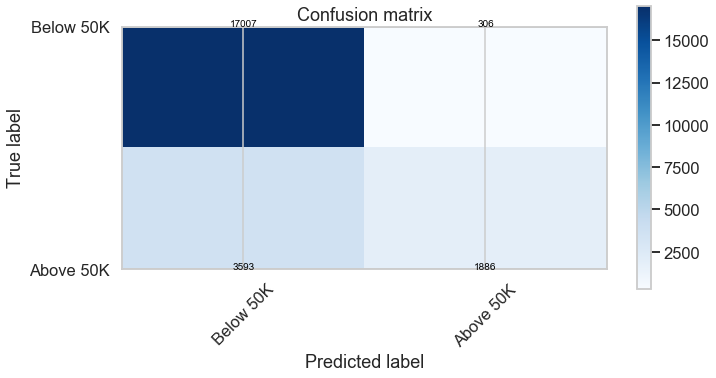

In [118]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
classes = ['Below 50K', 'Above 50K']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_train, y_pred))
#Checking performance our model with ROC Score.
print ('roc_auc_score:', roc_auc_score(y_train, y_pred))

In [119]:
scoreRF2 = cross_val_score(clf, X_train, y_train, cv=5, scoring= 'precision')

In [120]:
np.average(scoreRF2)

0.8260656555661721

In [81]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_train, y_pred_def)))

Model accuracy score with 10 decision-trees : 0.9863


In [121]:
print('Model accuracy score with 50 decision-trees : {0:0.4f}'. format(accuracy_score(y_train, y_pred)))

Model accuracy score with 50 decision-trees : 0.8289


In [88]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_train, y_pred)))

Model accuracy score with 100 decision-trees : 0.8289


### Build Random Forest Model on Select Features

In [96]:
X_train.columns

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc',
       ...
       'native_country_ Portugal', 'native_country_ Puerto-Rico',
       'native_country_ Scotland', 'native_country_ South',
       'native_country_ Taiwan', 'native_country_ Thailand',
       'native_country_ Trinadad&Tobago', 'native_country_ United-States',
       'native_country_ Vietnam', 'native_country_ Yugoslavia'],
      dtype='object', length=104)

## Model 2 KNN Vanilla

In [46]:
#Import library just in case you want to start from here
import pickle
import pandas as pd
X_train = pd.read_csv('X_train.csv', index_col=0)
pickle_in = open('y_train.pickle', 'rb')
y_train = pickle.load(pickle_in)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [57]:
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid={'n_neighbors':np.arange(1,20)}, cv=5)

In [58]:
knn_grid.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
knn_grid.best_params_

Let's run this model on our training set first!

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
#creating a confusion matrix template
import warnings
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10, 5]

# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[16387   926]
 [ 1424  4055]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     17313
           1       0.81      0.74      0.78      5479

    accuracy                           0.90     22792
   macro avg       0.87      0.84      0.85     22792
weighted avg       0.89      0.90      0.90     22792

roc_auc_score: 0.8433063691134638


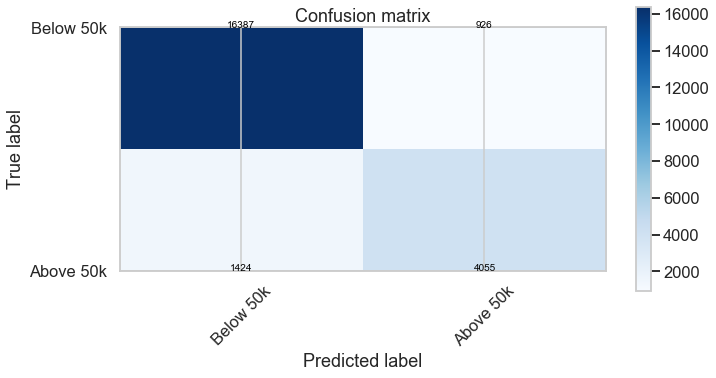

In [49]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
classes = ['Below 50k', 'Above 50k']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_train, y_pred))
#Checking performance our model with ROC Score.
print ('roc_auc_score:', roc_auc_score(y_train, y_pred))

In [50]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(knn, X_train, y_train, cv=5, scoring= 'accuracy')

In [51]:
np.average(scores1)

0.8574061030388652

#### Finding Best N_Neighbor Parameter --> TRY AGAIN**

In [53]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 3 to 8
k_range = range(3, 8)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='precision')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Precision')
plt.show()

KeyboardInterrupt: 

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

Based on the graph above, the best score might be: 


## Let's try KNN model with K=10

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Confusion Matrix, without normalization
[[16504   809]
 [ 1833  3646]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     17313
           1       0.82      0.67      0.73      5479

    accuracy                           0.88     22792
   macro avg       0.86      0.81      0.83     22792
weighted avg       0.88      0.88      0.88     22792

roc_auc_score: 0.8093610036407395


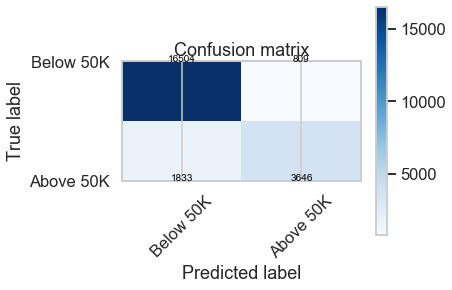

In [61]:
y_pred2 = knn2.predict(X_train)
# confusion_matrix(y_train, y_pred)

cm = confusion_matrix(y_train, y_pred2)
classes = ['Below 50K', 'Above 50K']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

# #Checking performance our model with classification report.
print(classification_report(y_train, y_pred2))
#Checking performance our model with ROC Score.
print ('roc_auc_score:', roc_auc_score(y_train, y_pred2))

In [62]:
scores2 = cross_val_score(knn2, X_train, y_train, cv=5, scoring= 'precision')

In [63]:
np.average(scores2)

0.7557621269332683

### Decision Tree (vanilla model) [just for comparison]

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [136]:
X_train = pd.read_csv('X_train.csv', index_col=0)

pickle_in = open('y_train.pickle', 'rb')
y_train = pickle.load(pickle_in)

In [137]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [138]:
clf.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [139]:
features = X_train.columns.tolist()

In [140]:
from sklearn.tree.export import export_text

r = export_text(clf, feature_names= features)
print(r)

|--- marital_status_ Married-civ-spouse <= 0.50
|   |--- capital_gain <= 7073.50
|   |   |--- education_num <= 1.17
|   |   |   |--- capital_loss <= 2218.50
|   |   |   |   |--- hours_per_week <= 0.50
|   |   |   |   |   |--- relationship_ Wife <= 0.50
|   |   |   |   |   |   |--- age <= -0.13
|   |   |   |   |   |   |   |--- age <= -0.53
|   |   |   |   |   |   |   |   |--- occupation_ Exec-managerial <= 0.50
|   |   |   |   |   |   |   |   |   |--- occupation_ Protective-serv <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- workclass_ Self-emp-not-inc <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- workclass_ Self-emp-not-inc >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- occupation_ Protective-serv >  0.50
|   |   |   |   |   |   |   |   |   |   |--- workclass_ Local-gov <= 0.50
|   |   |   |   |   |   |   |   |   |   | 

In [141]:
clf.tree_.node_count

6669

In [143]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("IncomeClassification_DTree_Vanilla")

'IncomeClassification_DTree_Vanilla.pdf'

In [144]:
y_pred = clf.predict(X_train)

In [145]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [146]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
print ('accuracy score:', clf.score(X_train, y_train))
print ('recall:', recall_score(y_train, y_pred))
print ('precision:', precision_score(y_train, y_pred))
print ('f1:', f1_score(y_train, y_pred))

accuracy score: 1.0
recall: 1.0
precision: 1.0
f1: 1.0


In [147]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring= 'precision')

In [148]:
np.average(scores)

0.6141775768644716

HyperParameter with Gridsearch

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
from sklearn.model_selection import GridSearchCV
tree_clf = DecisionTreeClassifier()

max_depth_params = range(2, 12)

max_features_param = [None, 'auto', 'sqrt', 'log2']

param_grid = {'max_depth': max_depth_params, 'max_features': max_features_param}

gridsearch = GridSearchCV(estimator = tree_clf, 
                          param_grid = param_grid,
                          n_jobs = -1, #parallel computation
                          verbose = 1, #give feedback
                          cv = 10, #cross-validate 10 times
                          scoring = 'precision', #can use multiple scoring  , recall, precision..ect
                          return_train_score= True)

gridsearch = gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    9.2s finished


In [151]:
gridsearch.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [152]:
gridsearch.best_score_

0.7898813985474905

In [153]:
gridsearch.cv_results_;


In [156]:
columns = ['params', 'mean_test_score', 
          'std_test_score', 'rank_test_score',
          'mean_train_score', 'std_train_score']

results = pd.DataFrame(gridsearch.cv_results_)[columns]
results.sort_values(by = 'rank_test_score').head(10)

,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
20,"{'max_depth': 7, 'max_features': None}",0.789881,0.019870,1,0.805084,0.007242
16,"{'max_depth': 6, 'max_features': None}",0.782153,0.016858,2,0.793014,0.009804
24,"{'max_depth': 8, 'max_features': None}",0.780049,0.030520,3,0.808302,0.015485
12,"{'max_depth': 5, 'max_features': None}",0.778278,0.018878,4,0.784133,0.007787
30,"{'max_depth': 9, 'max_features': 'sqrt'}",0.756953,0.052557,5,0.771310,0.037323
4,"{'max_depth': 3, 'max_features': None}",0.756463,0.020581,6,0.758062,0.007275
13,"{'max_depth': 5, 'max_features': 'auto'}",0.756018,0.095279,7,0.757219,0.111101
28,"{'max_depth': 9, 'max_features': None}",0.754934,0.036589,8,0.788787,0.031393
8,"{'max_depth': 4, 'max_features': None}",0.753788,0.019883,9,0.756603,0.008154
32,"{'max_depth': 10, 'max_features': None}",0.745949,0.027577,10,0.796823,0.030959


In [157]:
tuned_clf = DecisionTreeClassifier(max_depth = 2)

In [159]:
tuned_clf.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [160]:
features2 = X_train.columns.tolist()

In [161]:
tuned_clf.tree_.node_count

7

In [162]:
dot_data = tree.export_graphviz(tuned_clf, out_file=None, 
                     feature_names=features2,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Tuned_DTree1")

'Tuned_DTree1.pdf'

In [163]:
y_pred = tuned_clf.predict(X_train)

In [164]:
print ('accuracy:', tuned_clf.score(X_train, y_train))
print ('recall:', recall_score(y_train, y_pred))
print ('precision:', precision_score(y_train, y_pred))
print ('f1:', f1_score(y_train, y_pred))

accuracy: 0.8283608283608284
recall: 0.4469793757985034
precision: 0.7352146502551786
f1: 0.5559591373439273


Feature Selection

Optimal number of features: 106


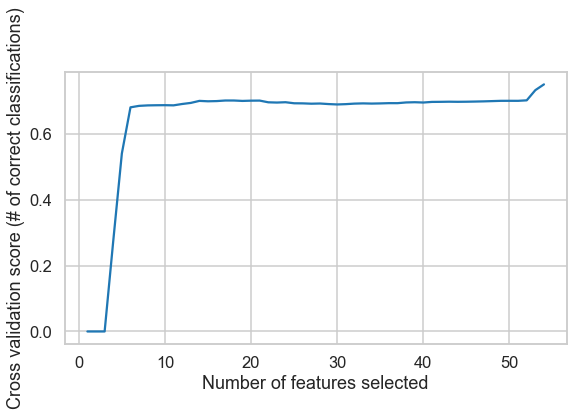

In [123]:
from sklearn.model_selection import StratifiedKFold
logreg = LogisticRegression()
#from sklearn.model_selection import KFold

rfecv = RFECV(estimator=logreg, step=2, cv=StratifiedKFold(5), scoring="precision")
#rfecv = RFECV(estimator=logreg, step=1, cv=KFold(10), scoring="accuracy")

rfecv.fit(X_train, y_train)

print("Optimal number of features: {}".format(rfecv.n_features_))

# Plotting the best number of features with respect to the Cross Validation Score:
plt.figure(figsize=(9,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

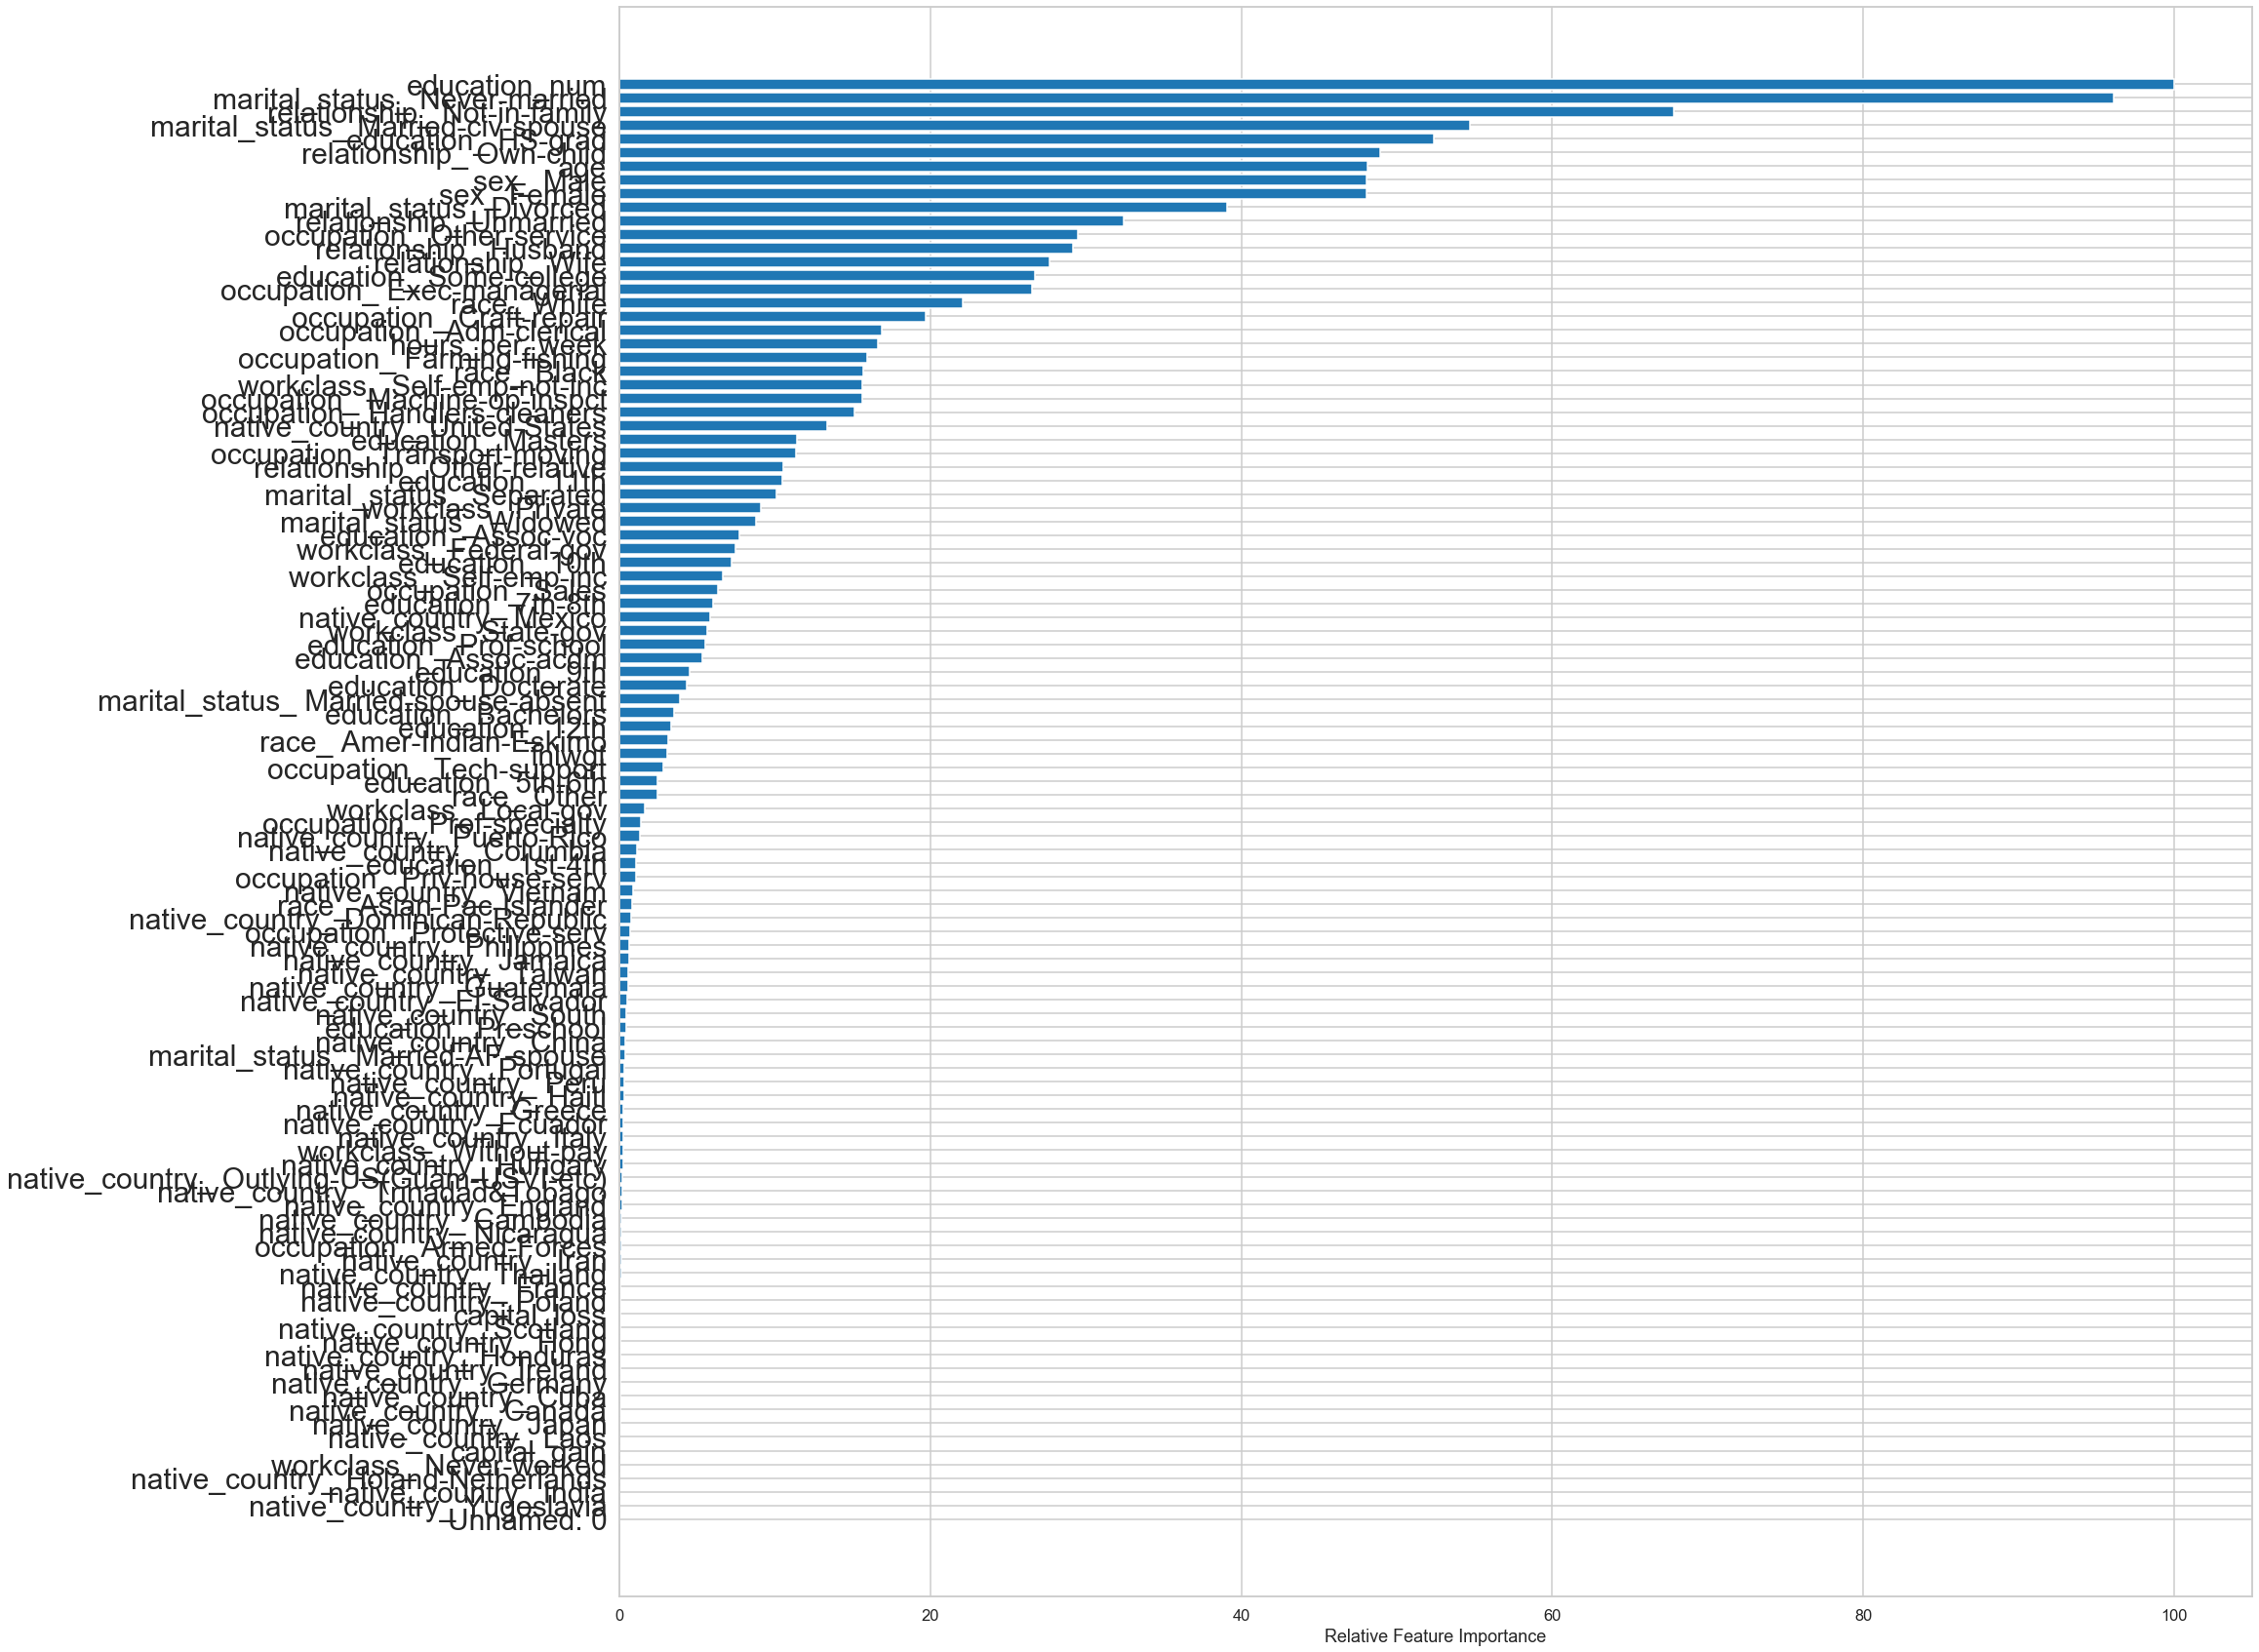

In [130]:
logreg = LogisticRegression(random_state=10, solver= "liblinear")
model = logreg.fit(X_train, y_train)
coefs = logreg.coef_.T
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(30,30))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=30)
featax.set_xlabel('Relative Feature Importance')
 
plt.tight_layout
plt.show()

## Results and Conclusion 

1. In this project, I built a Random Forest Classifier with data (w 5, 10,100 trees) and KNN model to predict the income of a person. I build two models, one with 10 decision-trees and another one with 100 decision-trees.

2. The model accurage score with 10 decision-trees is 0.97 but with a CV score of 0.73 which could be greatly improved. 
3. I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy.
4. I have removed the native_country_41 variable from the model, rebuild it and checked its accuracy. The accuracy of the model with native_country_41 variable removed is 0.8544. So, we can see that the model accuracy has been improved with native_country_41 variable removed from the model.
5. Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.

Random Forest (0.73)
0.99
0.98
0.97
KNN (0.85)
0.92
0.90

Decision Tree
1.0
1.0
1.0
